# Tokenization
> What is this nb about?

In [3]:
#| default_exp tokenization

In [4]:
#| export
#| hide
from nltk.tokenize import sent_tokenize

In [5]:
text = """
BILATERAL MAMMOGRAM

HISTORY:  65 year old female.  breast ca.  Right lumpectomy 2030.  Surveillance.

Films were compared with previous.

FINDINGS:  The breast tissue is heterogeneously dense.  There is no focal mass, suspicious calcification, or architectural distortion concerning for malignancy. Stable right breast post treatment changes.
IMPRESSION:  No mammographic evidence of malignancy.  Routine follow-up is recommended.

BIRADS 2
"""

## TOKENIZATION:
A lot of oddness with LLMs typically traces back to tokenization. What is tokenization?
A lot of issues with that may look like they're stemming from the neural network and the large language model itself are actualy issues with the tokenizations

If you've noticed that LLMs can't do spelling tasks very easily? That's usually due to tokenization
    These characters are chunked up into tokens and some of these tokens are fairly long..
Simple string processing tasks like reversing a string? tokenization
Non-english languages can work much worse and due to a large extent this is due to tokenization
Sometimes llms are bad at simple arithmetic? tokenization
Why did GPT-2 have more trouble with Python was due to tokenization

In [6]:
#| export
#| hide
from IPython.display import display,Image

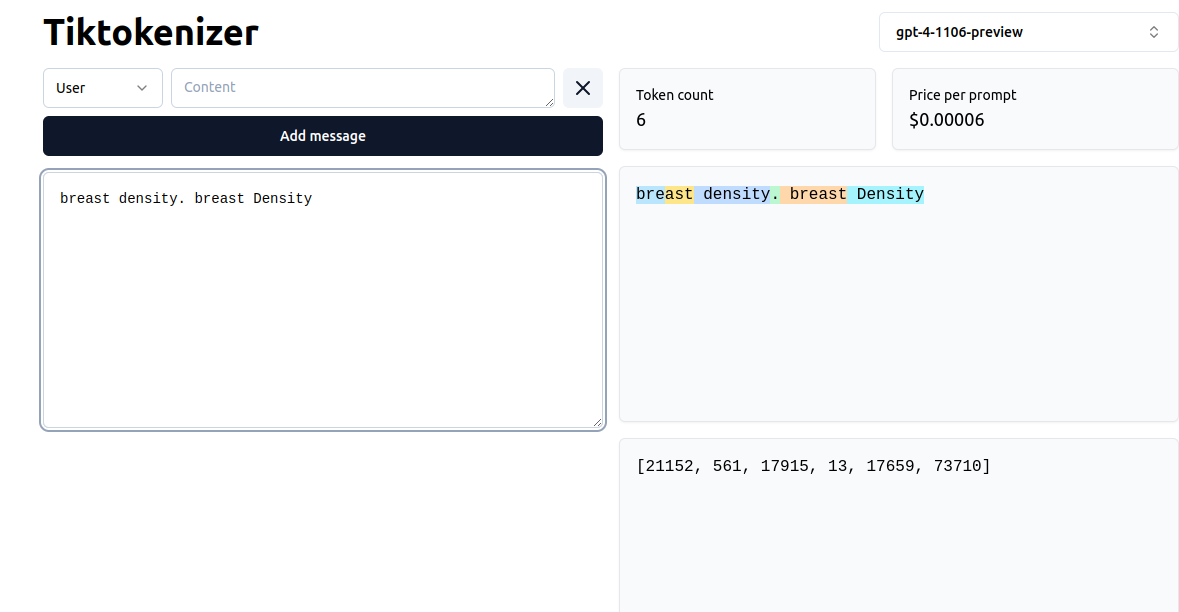

In [7]:
#| export
#| hide
display(Image('assets/brst-tokenizer.png'))

You can see `breast density` became 3 tokens [21152, 561, 17915] where as `. breast density` gets broken down into 2 tokens [17659, 17915] . Note that space + word is a token.

The word `breast` is fed as a single chunk into the LLM. It's pretty arbritary. It is case sensitive. So the same concept `breast` depending on if its at the beginning of a sentence, end of sentence, lower-upper case it has different corresponding ids. The LLM has to learn that these are all the same concepts and group them in the parameters. and learn that these are similar but not exactly the same.

If we use a lot more tokens to represent the same thing, it bloats up the sequence length of all the documents and in the attention  of the transformer when these tokens try to attend to each other you are running out of context in the max context length of that transformer. We're being way too wastful and taking up too much token space.

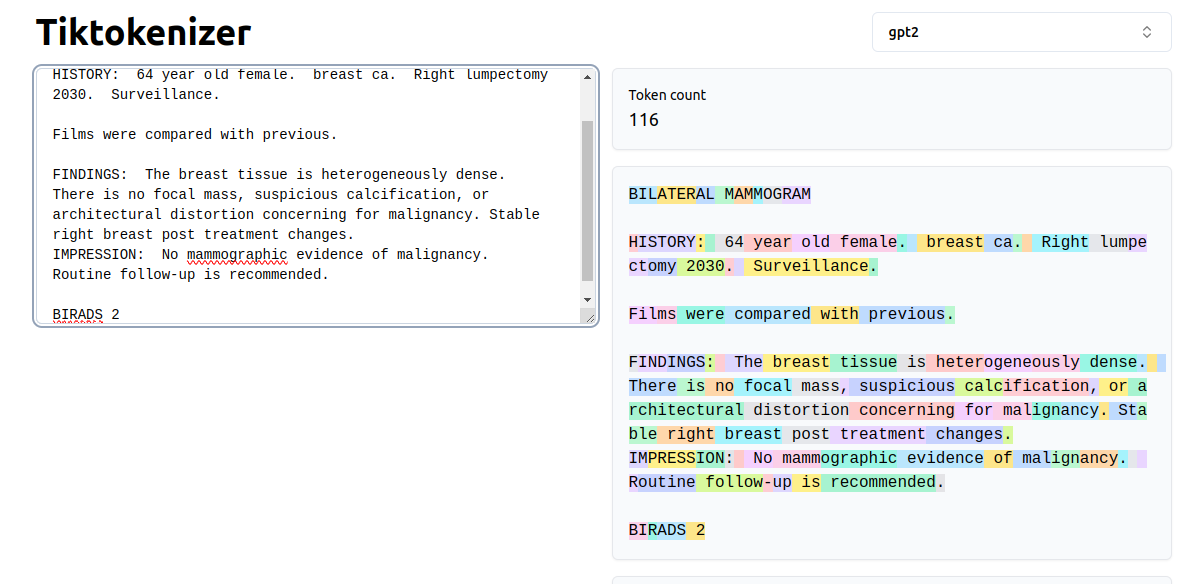

In [8]:
#| export
#| hide
display(Image('assets/gpt2.png'))

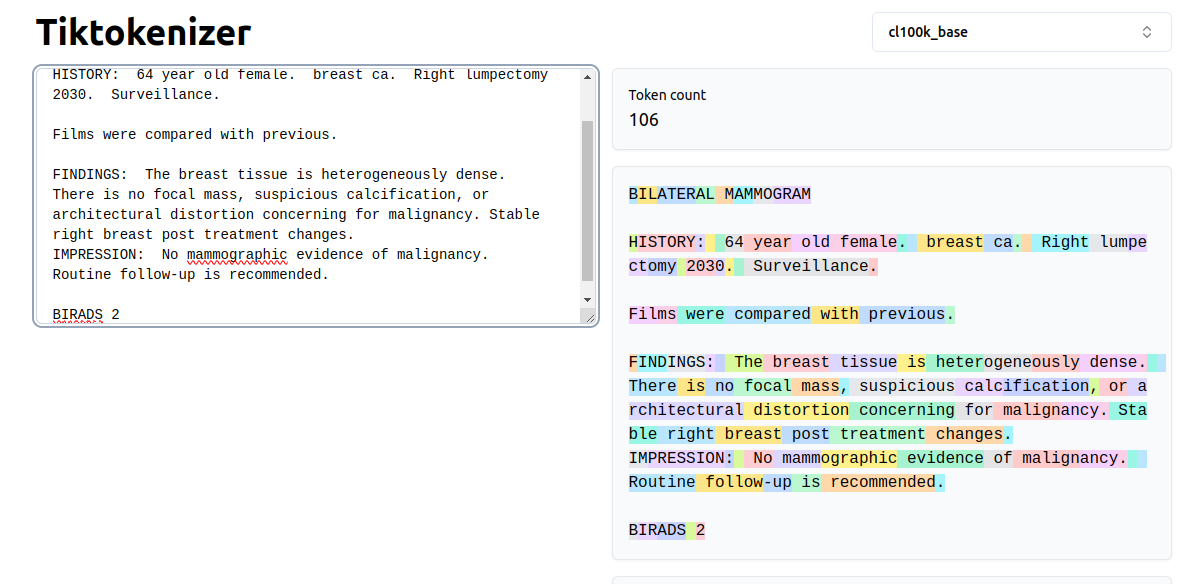

In [9]:
#| export
#| hide
display(Image('assets/ck100.png'))

CLK is 100k tokens vs the 50k tokens from gpt2. We went from ~ 116 to ~100. Now you can imagine this is a good thing because the same text is squished into less tokens. This is a more dense representation for the transformer. We can see more text for context as to what to produce next. BUT ofcourse just increasing the number of tokens in the vocab is not strictly better because now you're embedding table is sort of getting a lot larger and at the output token you have your softmax there and that grows as well. There's a sweet spot somewhere where everything is appropriately dense..A lot of the improvement is the design of the tokenizer and how it groups the tokens.

In [10]:
sent_tokenize(text)

['\nBILATERAL MAMMOGRAM\n\nHISTORY:  65 year old female.',
 'breast ca.',
 'Right lumpectomy 2030.',
 'Surveillance.',
 'Films were compared with previous.',
 'FINDINGS:  The breast tissue is heterogeneously dense.',
 'There is no focal mass, suspicious calcification, or architectural distortion concerning for malignancy.',
 'Stable right breast post treatment changes.',
 'IMPRESSION:  No mammographic evidence of malignancy.',
 'Routine follow-up is recommended.',
 'BIRADS 2']

## Tokens

In [12]:
from tiktoken import encoding_for_model
enc = encoding_for_model('text-davinci-003')
toks = enc.encode(text)
sub = toks[:30]
sub

[198,
 19676,
 23261,
 1847,
 337,
 2390,
 44,
 7730,
 24115,
 198,
 198,
 39,
 42480,
 25,
 220,
 6135,
 614,
 1468,
 4048,
 13,
 220,
 9296,
 1275,
 13,
 220,
 6498,
 46390,
 806,
 9145,
 25054]

In [13]:
[enc.decode_single_token_bytes(o).decode('utf-8') for o in sub]

['\n',
 'BIL',
 'ATER',
 'AL',
 ' M',
 'AM',
 'M',
 'OG',
 'RAM',
 '\n',
 '\n',
 'H',
 'ISTORY',
 ':',
 ' ',
 ' 65',
 ' year',
 ' old',
 ' female',
 '.',
 ' ',
 ' breast',
 ' ca',
 '.',
 ' ',
 ' Right',
 ' lum',
 'pect',
 'omy',
 ' 2030']

## References:
- Let's build GPT Tokenizer by Andrej Karpathy <https://www.youtube.com/watch?v=zduSFxRajkE&t=7051s>

In [14]:
#| hide
import nbdev; nbdev.nbdev_export()